In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import regularizers
import math

2024-04-20 19:23:40.913428: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 19:23:40.913548: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 19:23:41.081594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
def generateAugmentedDataFiles(original_dataset_dir, augmented_dataset_dir):
    desired_num_images=25000
    # Create directory if it doesn't exist
    os.makedirs(augmented_dataset_dir, exist_ok=True)
    
    # Initialize ImageDataGenerator for data augmentation
    #(change the augmentation parameters to try to have it generate more images to reach the desired number - currently 10,000 generated opposed to desired 25000)
    # increasing ranges should allow for greater range of possible images hence more images generated
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True,
        fill_mode='nearest')
    #datagen = ImageDataGenerator(
    #rotation_range=80,
    #width_shift_range=0.5,
    #height_shift_range=0.5,
    #shear_range=0.5,
    #zoom_range=0.5,
    #horizontal_flip=True,
    #fill_mode='nearest')

    # Load original images and apply augmentation to generate new images (consider putting the limit in img_path in frames for statement)
    fnames = [os.path.join(original_dataset_dir, fname) for fname in os.listdir(original_dataset_dir)]
    #fnames = [os.path.join(original_dataset_dir, fname) for fname in os.listdir(original_dataset_dir)[:desired_num_images]]
    print(len(fnames))
    num_augmented_per_original = math.ceil(desired_num_images / len(fnames))
    print(num_augmented_per_original)
    '''for img_path in fnames[:desired_num_images]:
        img = load_img(img_path)  # Load image
        x = img_to_array(img)  # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, img_height, img_width, channels)

        # Generate batches of augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dataset_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= num_augmented_per_original:  # Generate the desired number of images per original image
                break  # Break the loop to prevent infinite generation
    '''
    iteration = 0
    amount_generated = 0
    for img_path in fnames:
        if iteration > desired_num_images:
            break
        img = load_img(img_path)  # Load image
        x = img_to_array(img)  # Convert image to numpy array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, img_height, img_width, channels)

        # Generate batches of augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dataset_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            amount_generated += 1
            if i >= num_augmented_per_original:  # Generate the desired number of images per original image
                break  # Break the loop to prevent infinite generation
        iteration += 1
    print(iteration)
    print(amount_generated)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import shutil

generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Mild Dementia', 'augmented_data/Mild Dementia')
generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Moderate Dementia', 'augmented_data/Moderate Dementia')
generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Non Demented', 'augmented_data/Non Demented')
generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Very mild Dementia', 'augmented_data/Very mild Dementia')

generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Mild Dementia', 'augmented_data/Mild Dementia')
generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Moderate Dementia', 'augmented_data/Moderate Dementia')
generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Non Demented', 'augmented_data/Non Demented')
generateAugmentedDataFiles('/kaggle/input/imagesoasis/Data/Very mild Dementia', 'augmented_data/Very mild Dementia')

'''source_dir = '/kaggle/input/imagesoasis/Data/Non Demented'
destination_dir = 'augmented_data/Non Demented'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

files = os.listdir(source_dir)

# Copy each file from the source directory to the destination directory
for file in files:
    source_file = os.path.join(source_dir, file)
    destination_file = os.path.join(destination_dir, file)
    shutil.copy(source_file, destination_file)
    
source_dir = '/kaggle/input/imagesoasis/Data/Very mild Dementia'
destination_dir = 'augmented_data/Very mild Dementia'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)
    
files = os.listdir(source_dir)

for file in files:
    source_file = os.path.join(source_dir, file)
    destination_file = os.path.join(destination_dir, file)
    shutil.copy(source_file, destination_file)'''

5002
5
5002
25010
488
52
488
25376
67222
1
25001
25001
13725
2
13725
27450
5002
5
5002
25010
488
52
488
25376
67222
1
25001
25001
13725
2
13725
27450


"source_dir = '/kaggle/input/imagesoasis/Data/Non Demented'\ndestination_dir = 'augmented_data/Non Demented'\n\nif not os.path.exists(destination_dir):\n    os.makedirs(destination_dir)\n\nfiles = os.listdir(source_dir)\n\n# Copy each file from the source directory to the destination directory\nfor file in files:\n    source_file = os.path.join(source_dir, file)\n    destination_file = os.path.join(destination_dir, file)\n    shutil.copy(source_file, destination_file)\n    \nsource_dir = '/kaggle/input/imagesoasis/Data/Very mild Dementia'\ndestination_dir = 'augmented_data/Very mild Dementia'\n\nif not os.path.exists(destination_dir):\n    os.makedirs(destination_dir)\n    \nfiles = os.listdir(source_dir)\n\nfor file in files:\n    source_file = os.path.join(source_dir, file)\n    destination_file = os.path.join(destination_dir, file)\n    shutil.copy(source_file, destination_file)"

In [5]:
#for dirname, _, filenames in os.walk('/kaggle/working/'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
        #os.path.join(dirname, filename)

# Get list of files in the directory
files = os.listdir('/kaggle/working/augmented_data/Non Demented')

# Number of files
num_files = len(files)

print("Number of files in the directory:", num_files)

# Get list of files in the directory
files = os.listdir('/kaggle/working/augmented_data/Mild Dementia')

# Number of files
num_files = len(files)

print("Number of files in the directory:", num_files)

# Get list of files in the directory
files = os.listdir('/kaggle/working/augmented_data/Very mild Dementia')

# Number of files
num_files = len(files)

print("Number of files in the directory:", num_files)

# Get list of files in the directory
files = os.listdir('/kaggle/working/augmented_data/Moderate Dementia')

# Number of files
num_files = len(files)

print("Number of files in the directory:", num_files)

Number of files in the directory: 9923
Number of files in the directory: 9936
Number of files in the directory: 9948
Number of files in the directory: 9940


In [6]:
validation_split = 0.2

# generators
train_ds = keras.utils.image_dataset_from_directory(
    #directory = '/kaggle/input/imagesoasis/Data',
    directory = '/kaggle/working/augmented_data',
    validation_split=validation_split,
    subset="training",
    seed=42,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(248,496) 
)

validation_ds = keras.utils.image_dataset_from_directory(
    #directory = '/kaggle/input/imagesoasis/Data',
    directory = '/kaggle/working/augmented_data',
    validation_split=validation_split,
    subset="validation",
    seed=42,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(248,496)
)

Found 39747 files belonging to 4 classes.
Using 31798 files for training.
Found 39747 files belonging to 4 classes.
Using 7949 files for validation.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

#setting initial layer size to a large number of neurons throws errors

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(248,496,3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

#adding more neurons to existing layers raised validation accuracy from 45 to 52% while maintaing trianning accuracy around 70%

#model.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#model.add(Dropout(0.5)) #adding this layer does not seem to improve performance (also remains at 65% accuracy)

#model.add(Conv2D(1024,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#model.add(Dropout(0.5)) #adding this layer does not seem to improve performance (remains at 65% accuracy)

model.add(Flatten())

model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4,activation='softmax')) #change output from sigmoid to softmax and have multiple outputs

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 246, 494, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 246, 494, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 123, 247, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 123, 247, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 121, 245, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 121, 245, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 122, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 122, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 58, 120, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 58, 120, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 58, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 27, 58, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 29, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 29, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 27, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 27, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33280)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,259,968 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,185,156 (31.22 MB)

 Trainable params: 8,182,212 (31.21 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [10]:
#from tensorflow.keras.utils import to_categorical

# Extract labels from the datasets
#train_labels = train_ds.map(lambda x, y: y)
#validation_labels = validation_ds.map(lambda x, y: y)

# Convert integer labels to one-hot encoded labels
#train_labels_one_hot = to_categorical(train_ds, num_classes=4)
#validation_labels_one_hot = to_categorical(validation_ds, num_classes=4)

In [11]:
#testing learning rate effect to try to improve training accuracy
#from keras.optimizers import Adam

#optimizer = Adam(
    #learning_rate=0.0001 #lowering learning rate (before - 65% training accuracy 50% validation accuracy) fails to finish, stuck on epoch 7/10
    #learning_rate=0.0005 # overfitting is significantly worse (63% training accuracy 32% validation accuracy)
#)

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#default learning rate training accuracy 70.61% validation accuracy 45.72%
#after increasing amount of data in each subset from 10000 to 25000 training accuracy
#increased to 72.77% and validation accuracy to 64.66%

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


I0000 00:00:1713647691.066247      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713647691.092045      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


994/994 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.3773 - loss: 4.0691

W0000 00:00:1713648097.168003      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


994/994 ━━━━━━━━━━━━━━━━━━━━ 505s 442ms/step - accuracy: 0.3774 - loss: 4.0675 - val_accuracy: 0.3238 - val_loss: 2.7684
Epoch 2/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 374s 376ms/step - accuracy: 0.5671 - loss: 1.3895 - val_accuracy: 0.3938 - val_loss: 2.4651
Epoch 3/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 373s 375ms/step - accuracy: 0.6370 - loss: 1.2165 - val_accuracy: 0.4694 - val_loss: 1.8008
Epoch 4/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 371s 374ms/step - accuracy: 0.6797 - loss: 1.0904 - val_accuracy: 0.6698 - val_loss: 1.1382
Epoch 5/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 372s 374ms/step - accuracy: 0.7139 - loss: 1.0100 - val_accuracy: 0.5637 - val_loss: 1.3636
Epoch 6/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 371s 373ms/step - accuracy: 0.7318 - loss: 0.9415 - val_accuracy: 0.7447 - val_loss: 0.9191
Epoch 7/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 371s 373ms/step - accuracy: 0.7455 - loss: 0.9002 - val_accuracy: 0.7425 - val_loss: 0.9008
Epoch 8/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 370s 372ms/step - accuracy: 0.7577 - loss: 0.86

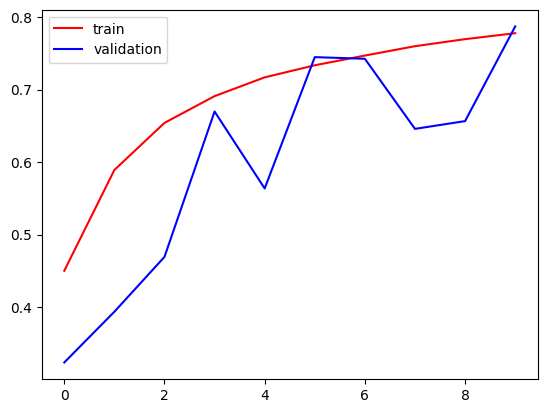

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#validation accuracy begins to plateau near the end

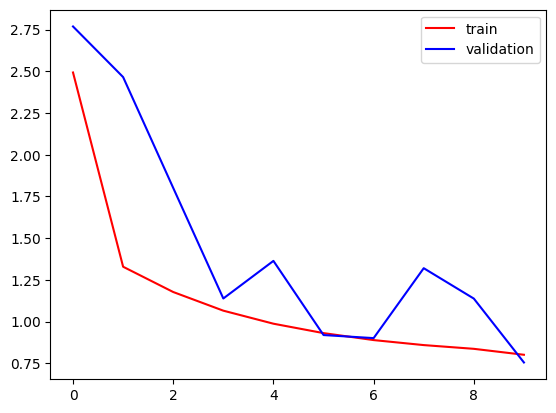

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

496 248
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


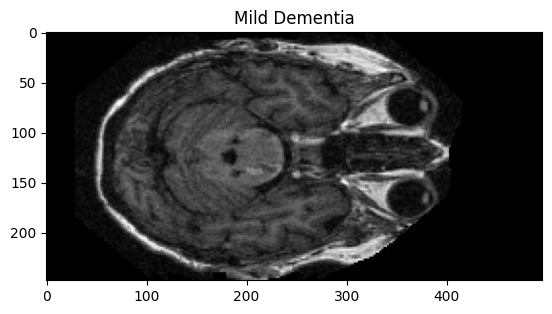

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/kaggle/input/imagesoasis/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_108.jpg'
img = image.load_img(img_path, target_size=(248,496))
#img = image.load_img(img_path)
width, height = img.size
print(width, height)
plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize the pixel values

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Decode the predictions
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']  # Define your class names
predicted_class_name = class_names[predicted_class]

# Display the image and prediction
plt.imshow(img)
plt.title(predicted_class_name)
plt.show()

In [17]:
#https://stackoverflow.com/questions/73564461/recall-and-precision-metrics-for-multi-class-classification-in-tensorflow-keras
#import keras.backend as K
#def precision(y_true, y_pred):
    #true_positives = tf.reduce_sum(tf.cast(tf.math.equal(y_true, 1) & tf.math.equal(tf.round(y_pred), 1), tf.float32), axis=0)
    #predicted_positives = tf.reduce_sum(tf.cast(tf.math.equal(tf.round(y_pred), 1), tf.float32), axis=0)
    #precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    #return precision

#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[tf.keras.metrics.Precision()])

In [18]:
#history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

In [19]:
#for testing
#import shutil

# Directory to be removed
#directory_to_remove = '/kaggle/working/augmented_data'

# Force remove the directory
#shutil.rmtree(directory_to_remove, ignore_errors=True)

In [20]:
#for testing
#for dirname, _, filenames in os.walk('/kaggle/working/'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
        #os.path.join(dirname, filename)

  3/249 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step

W0000 00:00:1713651478.388133      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step


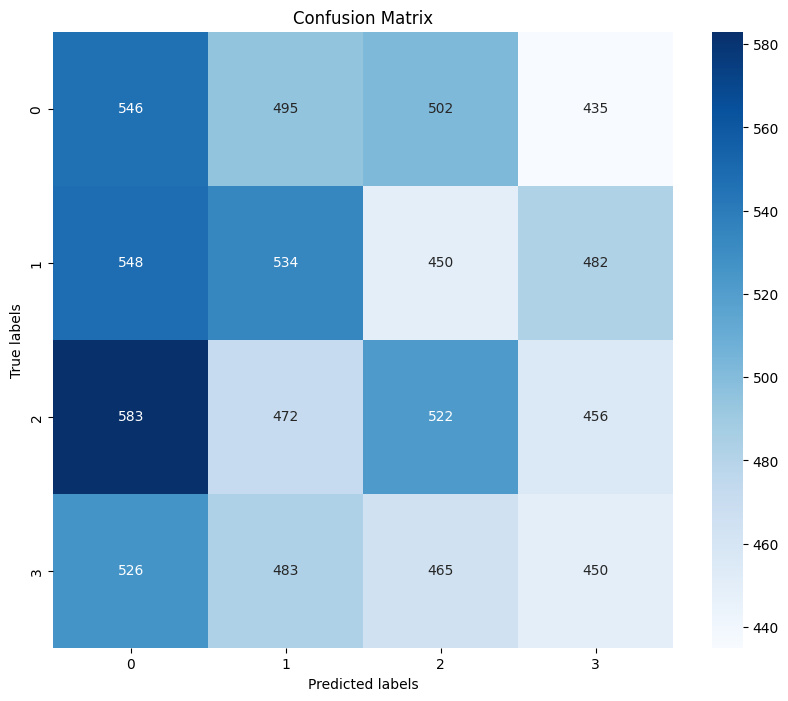

In [21]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

y_pred = model.predict(validation_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)  # Get true labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()